# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')

## Data Exploration

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#no of rows and columns in our dataset
df.shape

(1338, 7)

In [5]:
#getting the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#identifying categorical columns
categorical=df.select_dtypes(include='object').columns
categorical

Index(['sex', 'smoker', 'region'], dtype='object')

In [8]:
#identifying numerical columns
numeric=df.select_dtypes(include=['int64','float64']).columns
numeric

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
len(categorical)

3

In [10]:
len(numeric)

4

In [11]:
#Group dataset by categorical columns
df.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [12]:
df.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [13]:
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with Missing Values

In [14]:
#Check for any missing values
df.isnull().values.any()

False

In [15]:
#Check the no of missing values
df.isnull().values.sum()

0

In [16]:
categorical

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Encode the categorical data

In [21]:
## ONE HOT ENCODING
df=pd.get_dummies(data=df,drop_first=True)

In [22]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [23]:
df.shape

(1338, 9)

## Analysis with Plots

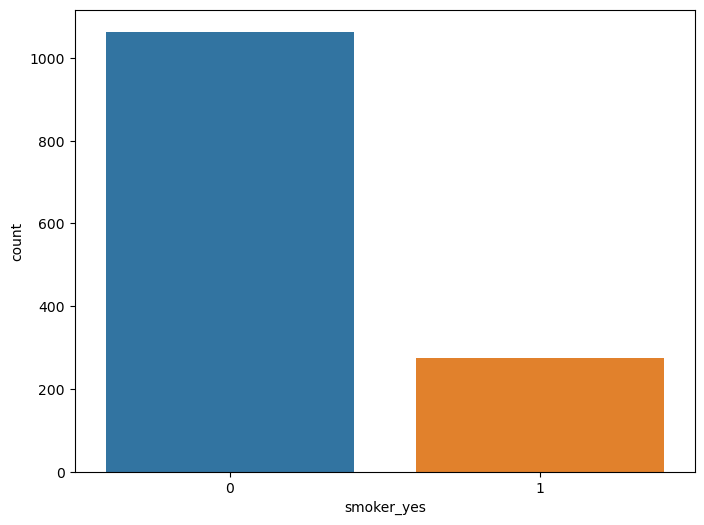

In [63]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='smoker_yes')
plt.show()



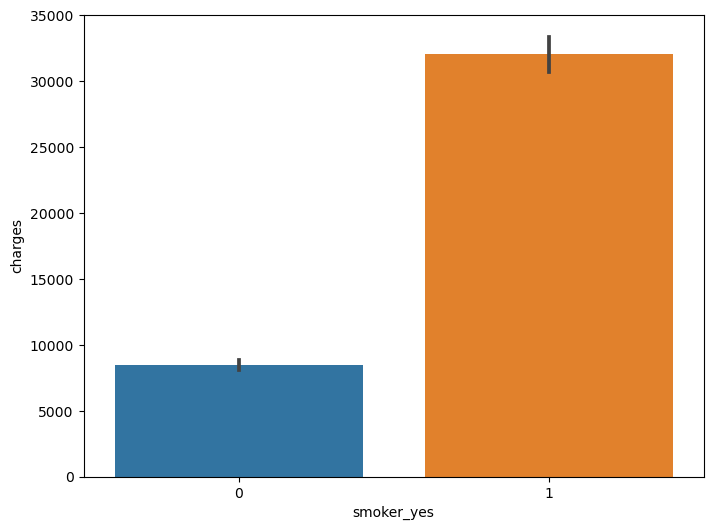

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x='smoker_yes',y='charges')
plt.show()

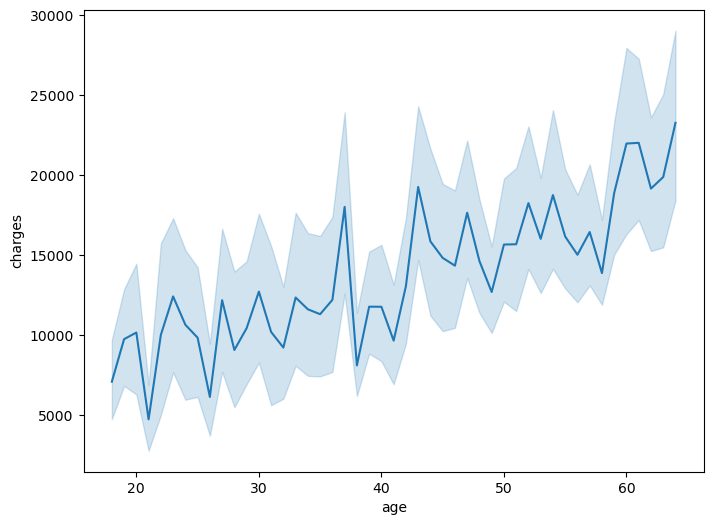

In [26]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='age',y='charges')
plt.show()

## Correlation Matrix

In [27]:
df2=df.drop(columns='charges')

<AxesSubplot:title={'center':'Correlation With Charges'}>

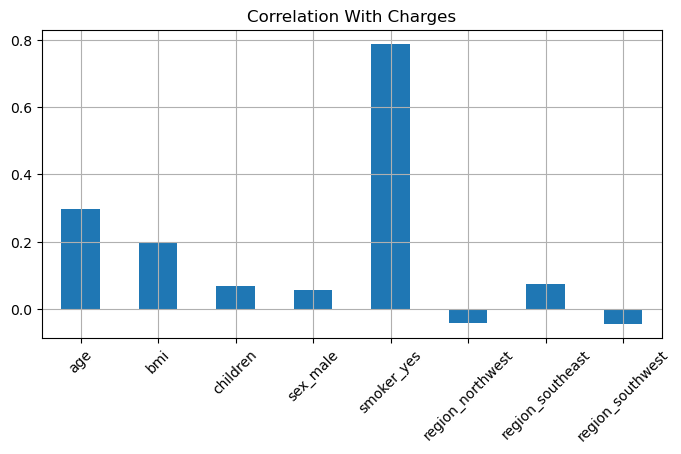

In [28]:
df2.corrwith(df['charges']).plot.bar(figsize=(8,4),title='Correlation With Charges',rot=45,grid=True)

In [29]:
corr=df.corr()

## Heatmap

<AxesSubplot:>

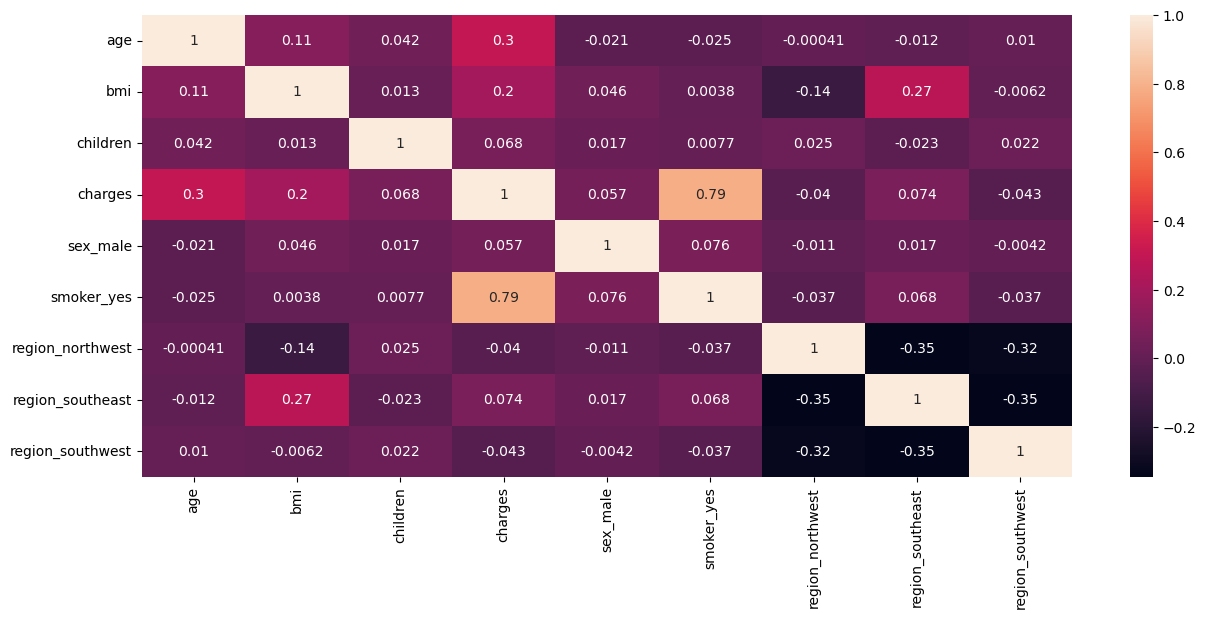

In [30]:
#heatmap
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True)

In [31]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Split the dataset

In [32]:
#matrix of features / independent variables
x=df.drop(columns='charges')

In [33]:
#target / dependent varibales
y=df['charges']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 8)
(1070,)
(268, 8)
(268,)


In [36]:
y_train.shape

(1070,)

In [37]:
x_test.shape

(268, 8)

In [38]:
y_test.shape

(268,)

## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [40]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [41]:
x_test

array([[ 0.88804863, -0.03584905, -0.1324111 , ..., -0.60033831,
        -0.59458839,  2.03809866],
       [ 0.5279926 , -0.18082248, -0.1324111 , ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.60000381,  1.77457214,  0.71249783, ...,  1.66572743,
        -0.59458839, -0.49065338],
       ...,
       [ 1.24810465,  1.72479211, -0.97732004, ..., -0.60033831,
        -0.59458839, -0.49065338],
       [-0.69619788,  1.50995197,  1.55740677, ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.4559814 , -0.97992301,  1.55740677, ..., -0.60033831,
        -0.59458839, -0.49065338]])

# Building the model

## 1.Muliple Linear Regression

In [42]:

from sklearn.linear_model import LinearRegression
regg_lr=LinearRegression()

regg_lr.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred=regg_lr.predict(x_test)

In [44]:
#Coefficient of Determination
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7997338990335741

In [45]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

3948.6192369659034
31868337.101186357
62.83803972886092


## 2.Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
regg_rf=RandomForestRegressor()
regg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
y_pred_rf=regg_rf.predict(x_test)

In [48]:
r2_score(y_test,y_pred_rf)

0.8649062593500748

## 3.XG Boost

In [49]:
from xgboost import XGBRFRegressor

In [50]:
regg_xgb=XGBRFRegressor()
regg_xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [51]:
y_pred_xgb=regg_xgb.predict(x_test)

In [52]:
r2_score(y_test,y_pred_xgb)

0.8918959266688847

# Final Prediction

### Example1

Name:Frank,age:40,sex=1,bmi:45.50,children:4,smoker:1,region:northeast

In [53]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [54]:
frank=[[40,45.5,4,1,1,0,0,0]]

In [55]:
#regg_xgb.predict(sc.transform(frank))

In [56]:
regg_xgb.predict((frank))

array([56405.65], dtype=float32)

### Example2

Name:Sara,age:19,sex=female,bmi:27.9,children:0,smoker:no,region:northewest

In [57]:
sara=[[19,27.9,0,0,0,1,0,0]]

In [58]:
#regg_xgb.predict(sc.transform(sara))

In [59]:
regg_xgb.predict((sara))

array([18191.78], dtype=float32)